In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler


In [2]:
train_features = pd.read_csv("train_features.csv")
test_features = pd.read_csv("test_features.csv")
train_salaries = pd.read_csv("train_salaries.csv")

In [3]:
train_features


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5


In [4]:
test_features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63


In [5]:
train_salaries


,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


# Discover the Data


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
training_features_salaries = train_features.merge(train_salaries, on = 'jobId')

In [10]:
training_data = training_features_salaries.copy()

In [11]:
training_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [12]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


# Clean the data 

In [13]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [14]:
training_data.describe(include = 'all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685252471,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [15]:
training_data.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [16]:
training_data.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [17]:
training_data.duplicated(keep=False) 

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [18]:
Salary_zero = training_data.loc[training_data.salary == 0, 'jobId']

In [19]:
Salary_zero

30559     JOB1362684438246
495984    JOB1362684903671
652076    JOB1362685059763
816129    JOB1362685223816
828156    JOB1362685235843
Name: jobId, dtype: object

In [20]:
training_data.drop(index = Salary_zero.index, axis = 0, inplace = True) 

In [21]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
training_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [23]:
num=training_data.select_dtypes(include=[np.number])
num

,yearsExperience,milesFromMetropolis,salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163
...,...,...,...
999995,19,94,88
999996,12,35,160
999997,16,81,64
999998,6,5,149


In [24]:
cat=training_data.select_dtypes(exclude=[np.number])
cat

,jobId,companyId,jobType,degree,major,industry
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE
...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH


#Visulaize the salary

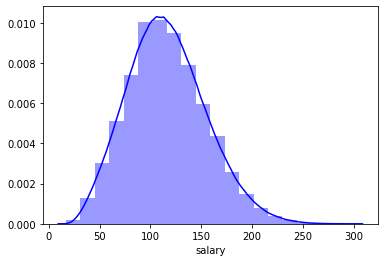

In [25]:
sns.distplot(training_data.salary, hist=True, bins= 20, color="blue")


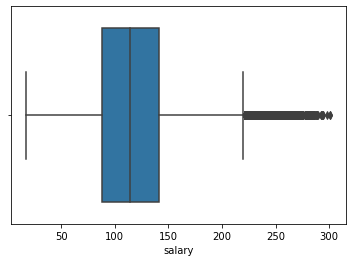

In [26]:

sns.boxplot(training_data.salary)

find the outliers 

In [27]:
dataset= training_data.salary.describe()
print(dataset)
IQR= dataset['75%']-dataset['25%']
upperlimit = dataset['75%'] + (1.5*IQR)
lowerlimit = dataset['25%'] - (1.5*IQR)
print("The upper outlier limit is" , upperlimit)
print("The lower outlier limit is" , lowerlimit)



count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper outlier limit is 220.5
The lower outlier limit is 8.5


 Examine potential outliers


In [28]:
training_data[training_data.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [29]:
training_data[training_data.salary>220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [30]:
training_data.loc[training_data.salary > 220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64


Junior's salary is suspicious outlier


In [31]:
training_data[(training_data.salary > 220.5) & (training_data.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In the above analysis, it is found that juiors who get more salaries are from FINANCE OR OIL industry which are highly paid industries and have higher degree

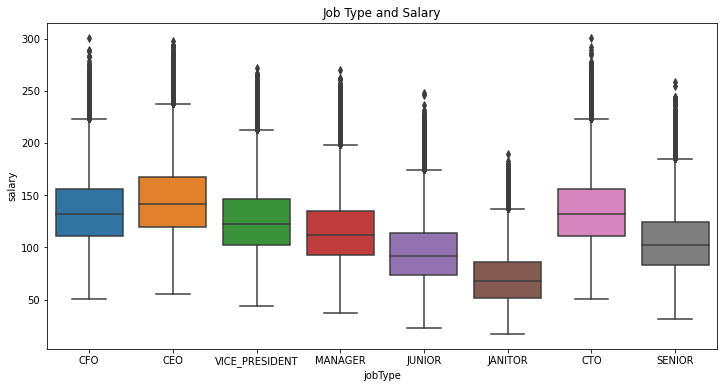

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x="jobType", y="salary", data= training_data)
plt.title("Job Type and Salary")
plt.show()

From the above boxplot, we can see that the highest paid jobtypes are CFO,CEO and CTO and the lowest paid jobtype is JANITOR

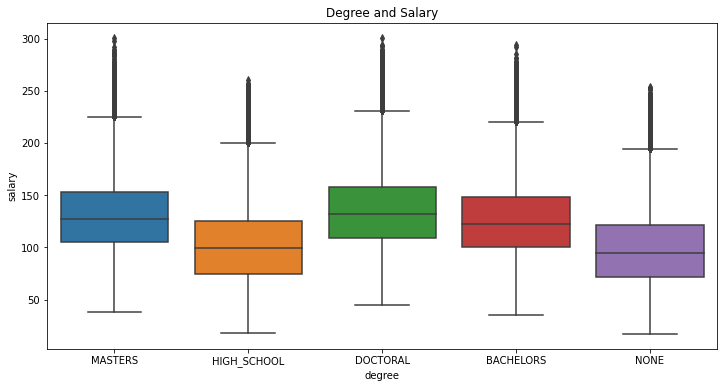

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="degree", y="salary", data= training_data)
plt.title("Degree and Salary")
plt.show()

From the plot, it can be seen that the MASTER'S AND DOCTORAL DEGREE have the highest salary and people with NO degree has the lowest pay.

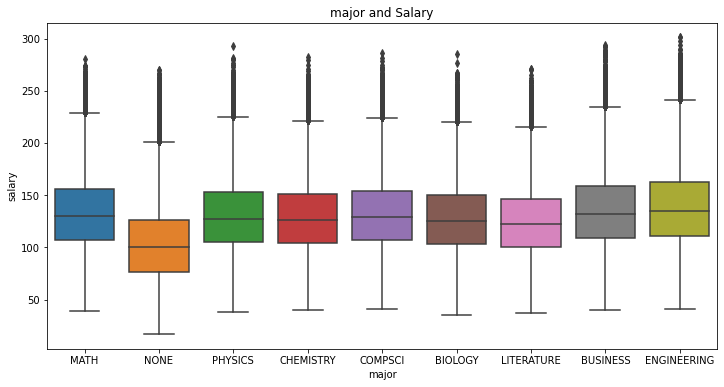

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="major", y="salary", data= training_data)
plt.title("major and Salary")
plt.show()

The above box plot shows that all the majors have almost same salary except the people with no majors

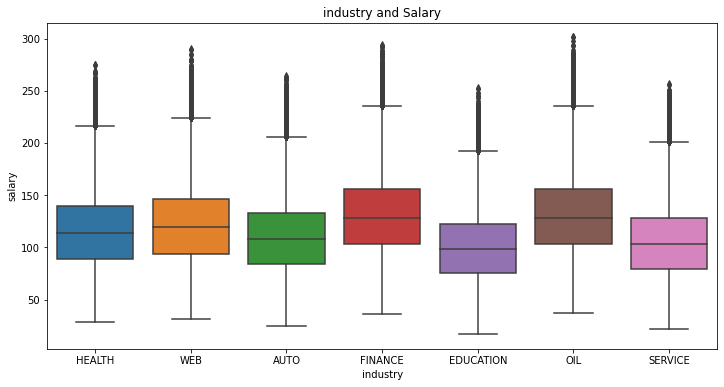

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="industry", y="salary", data= training_data)
plt.title("industry and Salary")
plt.show()

This box plot shows that the FINANCE and OIL INDUSTRY are the hisghest paid industries and EDUCATION INDUSTRY is less paid industry as compared to health, web, auto, service. 

Text(0.5, 1.0, 'Miles from Metropolis and Salary')

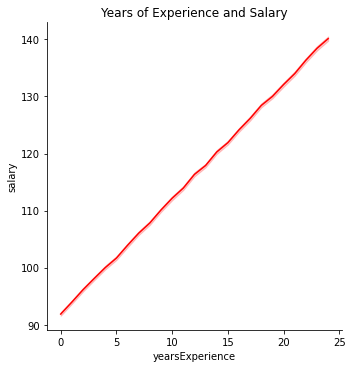

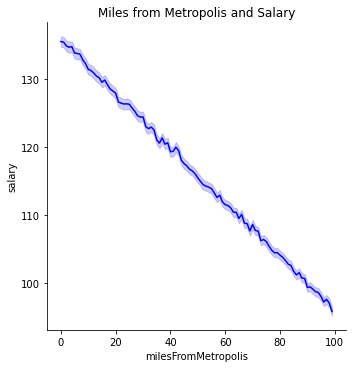

In [36]:
sns.relplot(x="yearsExperience",y="salary", kind="line", color="red",data= training_data)
plt.title("Years of Experience and Salary")

sns.relplot(x="milesFromMetropolis",y="salary", kind="line",color="b", data= training_data)
plt.title("Miles from Metropolis and Salary")



There is a positive correaltion between the Years of Experience and Salary means the experieneced person has more salaray as compared to the less experienced person

These two variables have the negative correlation, when the miles from metropolic increases, salary decreases

To apply all the variables in the model, we need to change the categorical variables into the numerical variables

In [37]:
training_data[['companyId','jobType','major','degree','industry']]=training_data[['companyId',
    'jobType','major','degree','industry']].astype('category')



In [38]:
corr_df = training_data.copy()

In [39]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for category in cats:
        cat_dict[category] = training_data[training_data[col] == category]['salary'].mean()   
    df[col] = df[col].map(cat_dict)





In [40]:

for col in corr_df.columns:
    if corr_df[col].dtype.name == "category":
        encode_label(corr_df, col)
        




In [41]:

corr_df[['companyId','jobType','major','degree','industry']]=corr_df[['companyId',
    'jobType','major','degree','industry']].astype('float64')



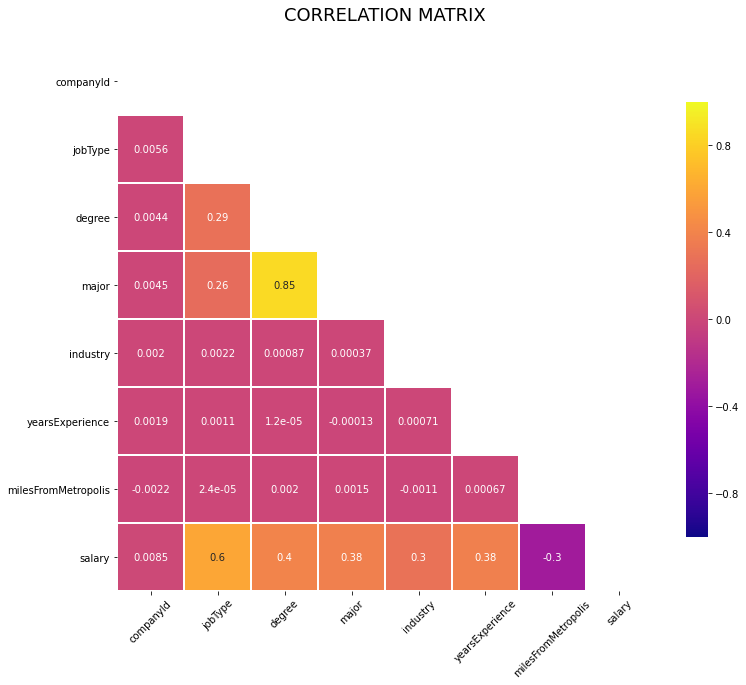

In [42]:
plt.figure(figsize=(12, 10))
corr = corr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))# adjust mask and df
mask = mask[:, :]
correlation = corr.iloc[:,:].copy()
sns.heatmap(correlation,mask=mask,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,cmap='plasma',annot=True,vmin=-1, vmax=1,linewidths=1,
           cbar_kws={"shrink": .8})# yticks
plt.yticks(rotation=0)
plt.xticks(rotation=45)
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='center', fontsize=18)
plt.show()

From the correlation matrix,job type and salary has a positive correlation followed by degree, major,years of Experience and industry.
-Degree and major are strongly correlates to each other
-Salary and miles from metropolis are negatively correlated


# Develop Solutions



Establish a Baseline

we create a baseline model and then compare the other model predictions with the baseline model to find out the best model for the analysis

For an instance, we can assume that HR managers use job type to calculate the salary, so we will calculate the average salary per job type and then calculate the mean squared error.




In [43]:
def baseline(df,col):
    jobs_dict = {}
    pred_salary =[]
    jobs = df[col].cat.categories.tolist()
    
    for job in jobs:
        jobs_dict[job] = training_data[training_data[col]== job]['salary'].mean()
    
    pred_salary = df[col].map(jobs_dict)
    return pred_salary

In [44]:
baseline(training_data,'jobType')



0         135.458547
1         145.311425
2         125.368630
3         115.368518
4         125.368630
             ...    
999995    125.368630
999996    135.481067
999997     95.333087
999998    135.458547
999999     95.333087
Name: jobType, Length: 999995, dtype: category
Categories (8, float64): [145.311425, 135.458547, 135.481067, 70.813045, 95.333087, 115.368518, 105.487775, 125.368630]

In [45]:
baseline_score = mse(training_data['salary'], baseline(training_data, 'jobType'))
print('baseline_model has an MSE of: ',baseline_score )

baseline_model has an MSE of:  963.9252996562975


We need to achieve lower mean_squared_error than the baseline mse. For that, we need to do feature engineering



# Feature Engineering

1. Job Id and Compaby Id will not use for modelling
2. Job Type, Degree, Major and Industry are the categorical features and need to create dummy variables for them
3. YearsExperience and MilesfromMetropolis are the numerical features

In [46]:
train_feature = training_data.drop(columns=['jobId', 'companyId', 'salary'])
train_target = training_data['salary']

--Before modelling standarize the numerical features 

In [47]:
mms = MinMaxScaler()

train_feature[['yearsExperience','milesFromMetropolis']] = mms.fit_transform(train_feature[['yearsExperience','milesFromMetropolis']])

In [48]:
num_var = ['yearsExperience', 'milesFromMetropolis']

cat_var = ['jobType','degree', 'major','industry']
categorical_df = pd.get_dummies(train_feature[cat_var], drop_first=True)
numerical_df = train_feature[num_var]

train_standard = pd.concat([categorical_df,numerical_df], axis=1)
train_standard.shape


(999995, 27)

----Creating Models

In [49]:
X = train_standard
y = train_target

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Models for Predicting Salaries

1. Linear Regression -  It is simple model which understands large data
2. Random Forest -  If we will not get the least mean squared from the Linear regression, this model will help to improve our results.
3. Gradient Boosting -  It will convert the weak learners into the strong learners in an additive manner

In [54]:

lr =  LinearRegression().fit(X_train,y_train)
r_sq = lr.score(X_train,y_train)
print("Coefficient of determination R-squared",r_sq)

Coefficient of determination R-squared 0.7439387881506949


In [55]:
lr_mse = mse(y_test,lr.predict(X_test))
print("The mean squared error of Linear Regression is", lr_mse)



The mean squared error of Linear Regression is 384.34090390921233


In [56]:
regressor = RandomForestRegressor(n_estimators=100, n_jobs=2, max_depth=20, min_samples_split=60, verbose=0)
neg_mse = cross_val_score(regressor,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
reg_mse = -1.0*np.mean(neg_mse)   
print("The mean squared error of Random Forest is", reg_mse)

The mean squared error of Random Forest is 378.0068996752402


In [74]:
gbr = GradientBoostingRegressor(n_estimators=170, max_depth=6, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gbr,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)
print("The mean squared error of Gradient Boosting is ", gbr_mse)

The mean squared error of Gradient Boosting is  359.55035817516284


In [89]:
# fitting the gradient boosting model
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=170)

In [90]:
row = pd.DataFrame({'model':['Linear Regression', 'Random Forest', 'Gradient Boosting'],
                    'mse': [lr_mse,reg_mse,gbr_mse]})
row

,model,mse
0,Linear Regression,384.340904
1,Random Forest,378.006900
2,Gradient Boosting,359.550358


Select the Best Model

In [91]:
print("The least mean squared error model is", row.min())


The least mean squared error model is model    Gradient Boosting
mse                 359.55
dtype: object


# Deploy Model

-- Fit the Gradient Boosting model on the testing dataset to ensure our predictions

In [92]:
test_data = test_features.copy()


In [93]:
num_test = ['yearsExperience', 'milesFromMetropolis']
cat_test = ['jobType','degree', 'major','industry']

mms_test = MinMaxScaler()
test_data[['yearsExperience','milesFromMetropolis']] = mms_test.fit_transform(test_data[['yearsExperience','milesFromMetropolis']])
cat_df = pd.get_dummies(test_data[cat_test], drop_first=True)
num_df = test_data[num_test]

test_final = pd.concat([cat_df,num_df], axis=1)
test_final.shape

(1000000, 27)

In [94]:
test_salary = pd.DataFrame(gbr.predict(test_final))


In [95]:
predictions =  pd.concat([test_features['jobId'], test_salary], axis=1)
predictions.head()

,jobId,0
0,JOB1362685407687,113.693902
1,JOB1362685407688,94.582975
2,JOB1362685407689,176.462125
3,JOB1362685407690,104.815037
4,JOB1362685407691,117.902190


In [96]:
predictions.to_csv('Predicted_salaries.csv')

# Feature Importance

In [103]:
importance = gbr.feature_importances_
feature_importances = pd.DataFrame({'Feature': test_final.columns, 'importance':importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.set_index('Feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

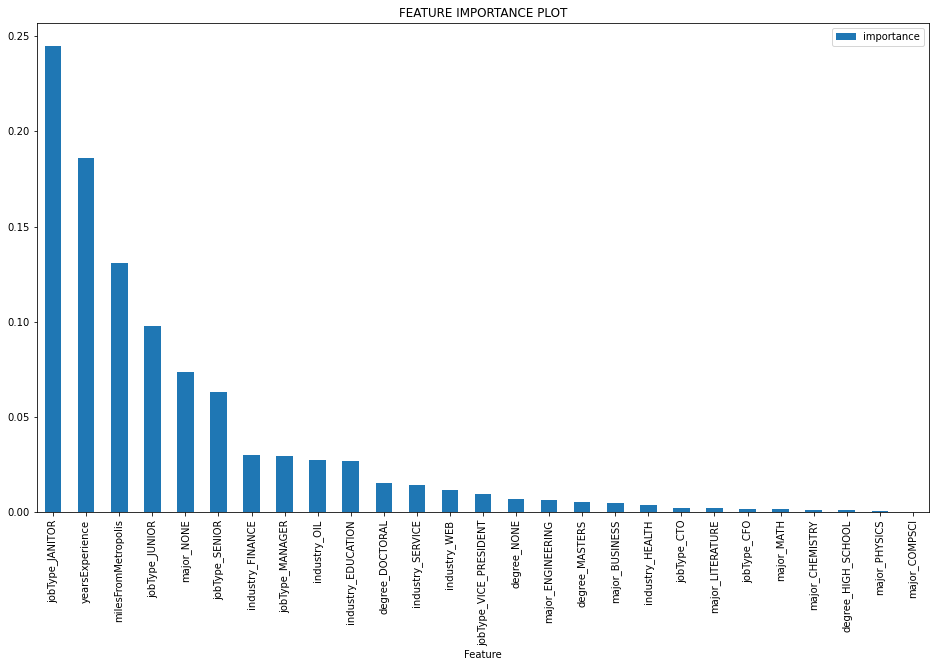

In [104]:

fig = feature_importances.plot.bar(figsize=(16,9))
fig.set_title('FEATURE IMPORTANCE PLOT')


# Thank You